<a href="https://colab.research.google.com/github/matalhim/mephi/blob/master/mephi/labs%20/2lab/Untitled12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

In [ ]:
a = np.array([
    [10, 1, 0, 0, 0],
    [2, 11, 3, 0, 0],
    [0, 4, 9, 1, 0],
    [0, 0, 3, 8, 1],
    [0, 0, 0, 2, 11]
])

b = np.array([10, 5, -3, 8, 4])

x = np.linalg.solve(a, b)
print('нампи:\n', x)


нампи:
 [ 0.95339129  0.46608711 -0.67791358  1.23687382  0.13875022]


## метод прогонки


In [ ]:
def run_method(a, b):
  n = len(b)

  x = np.zeros(n)
  alpha = np.zeros(n)
  beta = np.zeros(n)
  gamma = np.zeros(n)


  gamma[0] = a[0][0]
  alpha[0] = -a[0][1] / gamma[0]
  beta[0] = b[0] / gamma[0]

  for i in range(1, n-1):
    gamma[i] = a[i][i] + a[i][i-1] * alpha[i-1]
    alpha[i] = -a[i][i+1] / gamma[i]
    beta[i] = (b[i] - a[i][i-1] * beta[i-1]) / gamma[i]

  gamma[n-1] = a[n-1][n-1] + a[n-1][n-2] * alpha[n-2]
  beta[n-1] = (b[n-1] - a[n-1][n-2] * beta[n-2]) / gamma[n-1]

  x[n-1] = beta[n-1]
  for i in range(n - 2, -1, -1):
      x[i] = alpha[i] * x[i + 1] + beta[i]

  return x

x_run_method = run_method(a, b)
print('метод прогонки:\n', x_run_method)

err = np.linalg.norm(x - x_run_method) / np.linalg.norm(x)
print(err)




метод прогонки:
 [ 0.95339129  0.46608711 -0.67791358  1.23687382  0.13875022]
6.270477880451288e-17


## метод простой итерации

In [ ]:
def matrix_change(a, b):
    n = len(b)
    d = np.zeros((n, n))
    c = np.zeros(n)

    for i in range(n):
        for j in range(n):
            if i != j:
                d[i][j] = -a[i][j] / a[j][j]
        c[i] = b[i] / a[i][i]

    return d, c

d, c = matrix_change(a, b)

print(d)
print(c)

[[ 0.         -0.09090909  0.          0.          0.        ]
 [-0.2         0.         -0.33333333  0.          0.        ]
 [ 0.         -0.36363636  0.         -0.125       0.        ]
 [ 0.          0.         -0.33333333  0.         -0.09090909]
 [ 0.          0.          0.         -0.25        0.        ]]
[ 1.          0.45454545 -0.33333333  1.          0.36363636]


In [ ]:
def Dx_plus_c(x, d, c):
    result = np.zeros(len(x))
    for i in range(len(d)):
        for j in range(len(x)):
            result[i] += d[i][j] * x[j]

    for i in range(len(result)):
        result[i] += c[i]

    return result


def iteration_method(d, c, n):
    x = [1 for _ in range(len(c))]
    x_values = []
    for _ in range(n):
        x = Dx_plus_c(x, d, c)
        x_values.append(x)

    return x_values


x_iteration_method_values = iteration_method(d, c, 50)
print('метод простой итерации\n', x_iteration_method_values[-1])

NameError: name 'd' is not defined

In [ ]:
import matplotlib.pyplot as plt

err_values = [np.linalg.norm(x - x_iteration) / np.linalg.norm(x) for x_iteration in x_iteration_method_values]
print(err_values)
count = range(1, len(err_values) + 1)
plt.plot(count, err_values)

plt.title('')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

NameError: name 'x_iteration_method_values' is not defined

## матрица Гильберта

In [ ]:
def g_matrix(n):
  g = np.zeros((n, n))
  for i in range(n):
    for j in range(n):
        g [i][j] = 1 / (i + j + 1)
  print(g)
  print('\nчисло обусловленности: ',np.linalg.cond(g))
  print('\n')

  y = g.dot(np.ones((n)))

  x_g_matrix = iteration_method(g, y, 50)
  print('метод простой итерации\n',x_g_matrix[-1])

  x = np.linalg.solve(g, y)
  print(x)

  err_values = [np.linalg.norm(np.ones((n)) - x_iteration) / np.linalg.norm(np.ones((n))) for x_iteration in x_g_matrix]
  count = range(1, len(err_values) + 1)
  plt.plot(count, err_values)

  plt.title('')
  plt.xlabel('x')
  plt.ylabel('y')
  plt.show()

[[1.         0.5        0.33333333 0.25       0.2       ]
 [0.5        0.33333333 0.25       0.2        0.16666667]
 [0.33333333 0.25       0.2        0.16666667 0.14285714]
 [0.25       0.2        0.16666667 0.14285714 0.125     ]
 [0.2        0.16666667 0.14285714 0.125      0.11111111]]

число обусловленности:  476607.2502425855


метод простой итерации
 [3.27888008e+10 1.90360932e+10 1.37319810e+10 1.08223061e+10
 8.95981012e+09]
[1. 1. 1. 1. 1.]


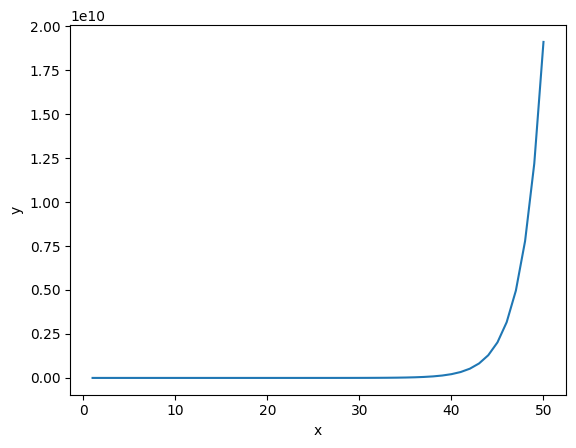

In [ ]:
g_matrix(5)

[[1.         0.5        0.33333333 0.25       0.2        0.16666667
  0.14285714 0.125      0.11111111 0.1        0.09090909 0.08333333]
 [0.5        0.33333333 0.25       0.2        0.16666667 0.14285714
  0.125      0.11111111 0.1        0.09090909 0.08333333 0.07692308]
 [0.33333333 0.25       0.2        0.16666667 0.14285714 0.125
  0.11111111 0.1        0.09090909 0.08333333 0.07692308 0.07142857]
 [0.25       0.2        0.16666667 0.14285714 0.125      0.11111111
  0.1        0.09090909 0.08333333 0.07692308 0.07142857 0.06666667]
 [0.2        0.16666667 0.14285714 0.125      0.11111111 0.1
  0.09090909 0.08333333 0.07692308 0.07142857 0.06666667 0.0625    ]
 [0.16666667 0.14285714 0.125      0.11111111 0.1        0.09090909
  0.08333333 0.07692308 0.07142857 0.06666667 0.0625     0.05882353]
 [0.14285714 0.125      0.11111111 0.1        0.09090909 0.08333333
  0.07692308 0.07142857 0.06666667 0.0625     0.05882353 0.05555556]
 [0.125      0.11111111 0.1        0.09090909 0.08333

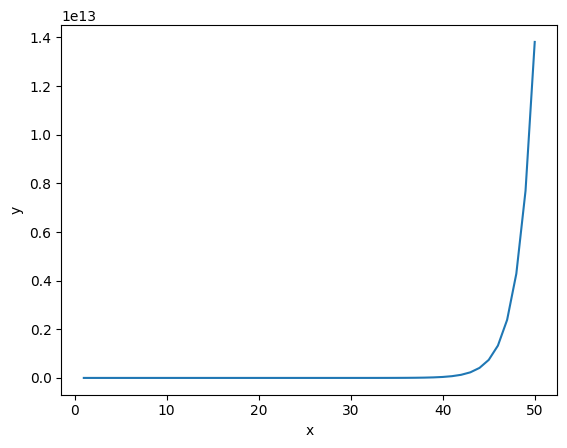

In [ ]:
g_matrix(12)

##метод Метод Гаусса – Зейделя
$a_{i1}x_1+...+a_{i,(i-1)}x_{i-1}+a_{i,i}x_{i}+a_{i,+1}x_{i+1}+...+a_{i,n}x_{n}=b_{i}\\
i=1,2,...,n\\
x^{k}_{i}=\frac{1}{a_{i,i}}(b_{i} - a_{1,i}x^{k}_{1}-...-a_{i,i-1}x^{k}_{i-1}-a_{i,i+1}x^{k-1}_{i+1}-...-a_{i,n}x^{k-1}_{n})\\
i=1,2,...,n\\
$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# a = np.array([
#     [2, 3, 5],
#     [3, 7, 4],
#     [1, 2, 2]
# ])

# b = np.array([10, 3, 3])

a = np.array([
    [10, 1, 0, 0, 0],
    [2, 11, 3, 0, 0],
    [0, 4, 9, 1, 0],
    [0, 0, 3, 8, 1],
    [0, 0, 0, 2, 11]
])

b = np.array([10, 5, -3, 8, 4])

n = len(b)

x = np.linalg.solve(a, b)
print('нампи:\n', x)
print('\n')


нампи:
 [ 0.95339129  0.46608711 -0.67791358  1.23687382  0.13875022]




In [ ]:
def iteration_method(A, b, count=1000, epsilon=1e-6):
    n = len(b)
    x_current = np.zeros(n)
    x_values = [x_current]

    for k in range(count):
        x_new = np.zeros(n)
        for i in range(n):
            x_new[i] = (b[i] - np.dot(A[i, :i], x_new[:i]) - np.dot(A[i, i+1:], x_current[i+1:])) / A[i, i]
        x_values.append(x_new)

        if np.max(np.abs(x_new - x_current)) < epsilon:
            break

        x_current = x_new

    return x_current, x_values
x_iteration_method, iterations = iteration_method(a, b)
print(x_iteration_method)

[ 0.95339151  0.46608671 -0.67791334  1.23687371  0.13875023]


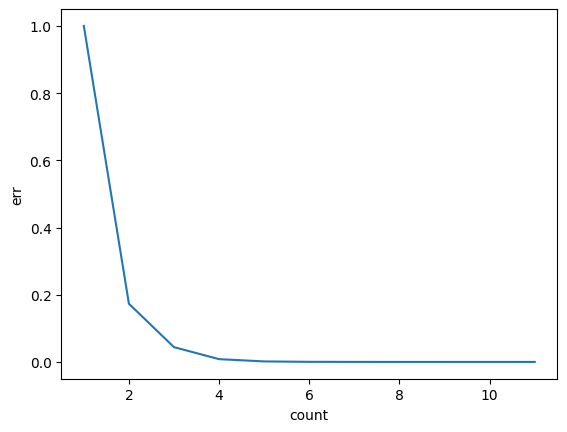

In [ ]:
import matplotlib.pyplot as plt

err_values = [np.linalg.norm(x - x_iteration) / np.linalg.norm(x) for x_iteration in iterations]
count = range(1, len(err_values) + 1)
plt.plot(count, err_values)

plt.title('')
plt.xlabel('count')
plt.ylabel('err')
plt.show()